<a href="https://colab.research.google.com/github/Rafiryd/Rafiryd/blob/rafiryd/skripsi32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proses Pengambilan data**

In [17]:
!pip install google-play-scraper

In [18]:
from google_play_scraper import app

import pandas as pd

import numpy as np

import seaborn as sns

In [19]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 1000 )

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.bukalapak.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=1300, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

Problems slovlig tools = mencari akar permasalahan pada suatu masalah

5 why

metode mencari problems sloving dengan cara menanyakan apa penyebab permasalahaan muncul dan mencari jawabannya. hal ini di lakUkan berkali klai sampai permasalahan dapat tergambar dengan jelas

action priority

diagram yang dapat di gunakan untuk mencari prioritas masalah berdasarkan impact atas benefit yang bisa diberikan dengan diagram ini kita memilih masalah yang impactnya mayoritas dari permasalahan yang ada.

fishbone digram

digram yang dapat di gunakan untuk merinci masalah dan membantu mencari akar masalah yang dapat dilihat dari beberapa point of view

flowchart/algo

metode pemecahan masalah dengan cara memetakan flow atau membuat pseudo algoritma yang untuk menentukan masalah dan cara untuk mencari solusinya secara sistematis

# **Data diproleh**

In [20]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,5aa5a272-d6f4-47fb-8852-a3091dbfdf29,Niko Alberto,https://play-lh.googleusercontent.com/a/AAcHTt...,Kekurangan nya Bukalapak itu. Ongkir nya Mahal...,1,15,5.32.2,2023-07-12 03:55:00,None,NaT,5.32.2
1,85ba5fc9-bd20-4a56-9d2f-ac8c14b086d0,Bella Ariesta,https://play-lh.googleusercontent.com/a/AAcHTt...,Saya beli token listrik di bukalapak melalu vi...,1,41,5.33.1,2023-07-09 12:47:34,None,NaT,5.33.1
2,b9406794-dbf1-4a90-9dcd-4973b6447004,Adhitia Okvianto,https://play-lh.googleusercontent.com/a-/AD_cM...,"Sangat membantu dalam berbelanja, mudah diguna...",5,48,5.33.1,2023-07-02 22:51:36,None,NaT,5.33.1
3,41a634f9-5db2-407e-b5fa-f64e821ee0bf,Huda Pria Kusuma,https://play-lh.googleusercontent.com/a-/AD_cM...,Saya mengunakan smartphone untuk membuka aplik...,1,42,5.33.1,2023-07-01 19:51:04,None,NaT,5.33.1
4,5a0260fb-38dd-4b13-ac11-d567754c9433,Teddy Kusumawirawan,https://play-lh.googleusercontent.com/a/AAcHTt...,gak jelas. mau transfer retur ke rekening. kod...,1,2,5.33.1,2023-07-13 11:56:59,None,NaT,5.33.1


In [21]:
len(df_busu.index) #count the number of data we got

1300

In [22]:
df_busu[['userName', 'score','at', 'content']].tail()  #preview userName, rating, date-time, and reviews only

,userName,score,at,content
1295,OM_BREW CHANNEL,1,2023-03-27 04:49:40,Semakin kesini aplikasi semakin berat dan load...
1296,Rifki DF,5,2023-04-20 04:15:32,Untuk kinerjanya udah pas n mantap maju terus ...
1297,Arka na,1,2021-05-24 15:58:25,Yang paling menyebalkan adalah terlalu besar m...
1298,Aditia Arga Pratama,3,2023-05-17 10:59:59,Pilihan untuk pengambilan emas untuk keping 10...
1299,irpan Rhamanda,5,2023-03-13 09:33:41,Aplikasi ini sangat keren ...apapun yang anda ...


# **Perubahan Penamaan Pada Setiap Kolom**

In [23]:
name_dataframe = df_busu.loc[:,["userName", "score", "at", "content"]]
name_dataframe.rename(columns={"userName": "Nama pengguna", "score":"Rating", "at": "Date", "content": "Ulasan"}, inplace=True)

In [24]:
name_dataframe.tail()

,Nama pengguna,Rating,Date,Ulasan
1295,OM_BREW CHANNEL,1,2023-03-27 04:49:40,Semakin kesini aplikasi semakin berat dan load...
1296,Rifki DF,5,2023-04-20 04:15:32,Untuk kinerjanya udah pas n mantap maju terus ...
1297,Arka na,1,2021-05-24 15:58:25,Yang paling menyebalkan adalah terlalu besar m...
1298,Aditia Arga Pratama,3,2023-05-17 10:59:59,Pilihan untuk pengambilan emas untuk keping 10...
1299,irpan Rhamanda,5,2023-03-13 09:33:41,Aplikasi ini sangat keren ...apapun yang anda ...


In [25]:
name_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Nama pengguna  1300 non-null   object        
 1   Rating         1300 non-null   int64         
 2   Date           1300 non-null   datetime64[ns]
 3   Ulasan         1300 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 40.8+ KB


In [26]:
import nltk

In [27]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [28]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].astype(str)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan
0,Niko Alberto,1,2023-07-12 03:55:00,Kekurangan nya Bukalapak itu. Ongkir nya Mahal...
1,Bella Ariesta,1,2023-07-09 12:47:34,Saya beli token listrik di bukalapak melalu vi...
2,Adhitia Okvianto,5,2023-07-02 22:51:36,"Sangat membantu dalam berbelanja, mudah diguna..."
3,Huda Pria Kusuma,1,2023-07-01 19:51:04,Saya mengunakan smartphone untuk membuka aplik...
4,Teddy Kusumawirawan,1,2023-07-13 11:56:59,gak jelas. mau transfer retur ke rekening. kod...


# **Case folding**

In [29]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].str.lower()

# **cleansing**

In [30]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_links)

In [31]:
#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_number)

In [32]:
#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_punctuation)

In [33]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_singl_char)

# **Tokenizing**

In [34]:
# Tokenisasi
def word_tokenize_wrapper(text):
    return word_tokenize(text)

name_dataframe['Ulasan_tokenize'] = name_dataframe['Ulasan'].apply(word_tokenize_wrapper)

In [35]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
0,Niko Alberto,1,2023-07-12 03:55:00,kekurangan nya bukalapak itu ongkir nya mahal ...,"[kekurangan, nya, bukalapak, itu, ongkir, nya,..."
1,Bella Ariesta,1,2023-07-09 12:47:34,saya beli token listrik di bukalapak melalu vi...,"[saya, beli, token, listrik, di, bukalapak, me..."
2,Adhitia Okvianto,5,2023-07-02 22:51:36,sangat membantu dalam berbelanja mudah digunak...,"[sangat, membantu, dalam, berbelanja, mudah, d..."
3,Huda Pria Kusuma,1,2023-07-01 19:51:04,saya mengunakan smartphone untuk membuka aplik...,"[saya, mengunakan, smartphone, untuk, membuka,..."
4,Teddy Kusumawirawan,1,2023-07-13 11:56:59,gak jelas mau transfer retur ke rekening kode ...,"[gak, jelas, mau, transfer, retur, ke, rekenin..."
...,...,...,...,...,...
1295,OM_BREW CHANNEL,1,2023-03-27 04:49:40,semakin kesini aplikasi semakin berat dan load...,"[semakin, kesini, aplikasi, semakin, berat, da..."
1296,Rifki DF,5,2023-04-20 04:15:32,untuk kinerjanya udah pas mantap maju terus ...,"[untuk, kinerjanya, udah, pas, mantap, maju, t..."
1297,Arka na,1,2021-05-24 15:58:25,yang paling menyebalkan adalah terlalu besar m...,"[yang, paling, menyebalkan, adalah, terlalu, b..."
1298,Aditia Arga Pratama,3,2023-05-17 10:59:59,pilihan untuk pengambilan emas untuk keping ...,"[pilihan, untuk, pengambilan, emas, untuk, kep..."


In [36]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize'], dtype='object')

In [37]:
#Run This Code to Sort the Data By Date
# tanggal 26-04-2022 sampai 12-10-2022

new_df = name_dataframe[['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize']]
sorted_df = new_df.sort_values(by='Date', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
324,samlay 25,5,2023-07-15 08:53:48,aplikasi yang sangat baik untuk segala keperlu...,"[aplikasi, yang, sangat, baik, untuk, segala, ..."
15,Sakir Aral,1,2023-07-15 05:43:23,percuma di kasih limit paylater tidak bisa di ...,"[percuma, di, kasih, limit, paylater, tidak, b..."
938,ovut Ibrahim,1,2023-07-15 04:48:02,kali ini saya kecewa masa ambil pulsa yg ri...,"[kali, ini, saya, kecewa, masa, ambil, pulsa, ..."
138,vfahdian,1,2023-07-15 02:45:25,pelayanan buruk dari admin saat ingin menanyak...,"[pelayanan, buruk, dari, admin, saat, ingin, m..."
293,Kukuh Sugiarto,5,2023-07-15 02:20:20,dapat di gunakan sesuai kebutuhan barang dan p...,"[dapat, di, gunakan, sesuai, kebutuhan, barang..."


In [38]:
sorted_df.dtypes

Nama pengguna              object
Rating                      int64
Date               datetime64[ns]
Ulasan                     object
Ulasan_tokenize            object
dtype: object

In [39]:
import pandas as pd

# Assuming you have a DataFrame named ulasan with columns 'Ulasan_tokenize' and 'Ulasan_ears'

word_to_erase = 'nya'  # Replace 'word' with the word you want to erase

name_dataframe["ulasan_ears"] = name_dataframe['Ulasan_tokenize'].apply(lambda x: [word for word in x if word != word_to_erase])

print(name_dataframe)


            Nama pengguna  Rating                Date  \
0            Niko Alberto       1 2023-07-12 03:55:00   
1           Bella Ariesta       1 2023-07-09 12:47:34   
2        Adhitia Okvianto       5 2023-07-02 22:51:36   
3        Huda Pria Kusuma       1 2023-07-01 19:51:04   
4     Teddy Kusumawirawan       1 2023-07-13 11:56:59   
...                   ...     ...                 ...   
1295      OM_BREW CHANNEL       1 2023-03-27 04:49:40   
1296             Rifki DF       5 2023-04-20 04:15:32   
1297              Arka na       1 2021-05-24 15:58:25   
1298  Aditia Arga Pratama       3 2023-05-17 10:59:59   
1299       irpan Rhamanda       5 2023-03-13 09:33:41   

                                                 Ulasan  \
0     kekurangan nya bukalapak itu ongkir nya mahal ...   
1     saya beli token listrik di bukalapak melalu vi...   
2     sangat membantu dalam berbelanja mudah digunak...   
3     saya mengunakan smartphone untuk membuka aplik...   
4     gak jelas mau 

In [40]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears
0,Niko Alberto,1,2023-07-12 03:55:00,kekurangan nya bukalapak itu ongkir nya mahal ...,"[kekurangan, nya, bukalapak, itu, ongkir, nya,...","[kekurangan, bukalapak, itu, ongkir, mahal, pe..."
1,Bella Ariesta,1,2023-07-09 12:47:34,saya beli token listrik di bukalapak melalu vi...,"[saya, beli, token, listrik, di, bukalapak, me...","[saya, beli, token, listrik, di, bukalapak, me..."
2,Adhitia Okvianto,5,2023-07-02 22:51:36,sangat membantu dalam berbelanja mudah digunak...,"[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d..."
3,Huda Pria Kusuma,1,2023-07-01 19:51:04,saya mengunakan smartphone untuk membuka aplik...,"[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,..."
4,Teddy Kusumawirawan,1,2023-07-13 11:56:59,gak jelas mau transfer retur ke rekening kode ...,"[gak, jelas, mau, transfer, retur, ke, rekenin...","[gak, jelas, mau, transfer, retur, ke, rekenin..."


In [41]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

Ulasan_fqsist = name_dataframe['ulasan_ears'].apply(freqDist_wrapper)

print('Frequency Tokens : \n')
print(Ulasan_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(di, 6), (yang, 4), (sampai, 3), (bukalapak, ...
1    [(saya, 2), (di, 2), (bukalapak, 2), (sudah, 2...
2    [(dan, 2), (sangat, 1), (membantu, 1), (dalam,...
3    [(saya, 4), (untuk, 3), (dan, 3), (smartphone,...
4    [(ke, 4), (gak, 2), (mau, 2), (transfer, 2), (...
Name: ulasan_ears, dtype: object


In [42]:
print(name_dataframe.columns)

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'ulasan_ears'],
      dtype='object')


In [43]:
name_dataframe['Ulasan_tokenize'].unique

<bound method Series.unique of 0       [kekurangan, nya, bukalapak, itu, ongkir, nya,...
1       [saya, beli, token, listrik, di, bukalapak, me...
2       [sangat, membantu, dalam, berbelanja, mudah, d...
3       [saya, mengunakan, smartphone, untuk, membuka,...
4       [gak, jelas, mau, transfer, retur, ke, rekenin...
                              ...                        
1295    [semakin, kesini, aplikasi, semakin, berat, da...
1296    [untuk, kinerjanya, udah, pas, mantap, maju, t...
1297    [yang, paling, menyebalkan, adalah, terlalu, b...
1298    [pilihan, untuk, pengambilan, emas, untuk, kep...
1299    [aplikasi, ini, sangat, keren, apapun, yang, a...
Name: Ulasan_tokenize, Length: 1300, dtype: object>

In [44]:
slank_word_dict = {
    "berjalansudah" : "berjalan",
    "paraah" : "parah",
    "keduakali" : "",
    "keduakali" : "kedua kali",
    "agak" : "sedikit",
    "pas" : "saat",
    "produkx" : "produknya",
    "sukamkasih" : "suka makasih",
    "gak" : "tidak",
    "cpt" : "cepat",
    "sdh" : "sudah",
    "recommend" : "rekomendasi",
    "bagusseller" : "bagus",
    "bagusssss" : "bagus",
    "bagussssss" : "bagus",
    "baguuussss" : "bagus",
    "cepatmakasih": "cepat",
    "cepatmantappp": "cepat",
    "cepatproduct": "cepat",
    "cepatrecomended": "cepat",
    "cepattoko": "cepat",
    "recomended": "rekomendasi",
    "recommended": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomended": "rekomendasi",
    }

def slank_normalized_term(document):
    return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

# **Normalization**

In [47]:
normalizad_word = pd.read_csv("/content/kamusindonesia.csv (4).csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [48]:
name_dataframe['Ulasan_normalized'] = name_dataframe['Ulasan_tokenize'].apply(normalized_term).apply(slank_normalized_term)

In [49]:
name_dataframe.head(100)

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized
0,Niko Alberto,1,2023-07-12 03:55:00,kekurangan nya bukalapak itu ongkir nya mahal ...,"[kekurangan, nya, bukalapak, itu, ongkir, nya,...","[kekurangan, bukalapak, itu, ongkir, mahal, pe...","[kekurangan, nya, bukalapak, itu, ongkir, nya,..."
1,Bella Ariesta,1,2023-07-09 12:47:34,saya beli token listrik di bukalapak melalu vi...,"[saya, beli, token, listrik, di, bukalapak, me...","[saya, beli, token, listrik, di, bukalapak, me...","[saya, beli, token, listrik, di, bukalapak, me..."
2,Adhitia Okvianto,5,2023-07-02 22:51:36,sangat membantu dalam berbelanja mudah digunak...,"[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d..."
3,Huda Pria Kusuma,1,2023-07-01 19:51:04,saya mengunakan smartphone untuk membuka aplik...,"[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,..."
4,Teddy Kusumawirawan,1,2023-07-13 11:56:59,gak jelas mau transfer retur ke rekening kode ...,"[gak, jelas, mau, transfer, retur, ke, rekenin...","[gak, jelas, mau, transfer, retur, ke, rekenin...","[enggak, jelas, mau, transfer, retur, ke, reke..."
...,...,...,...,...,...,...,...
95,Nizar Rayyan,1,2023-04-16 23:03:31,paylater ngk bener selalu di batalkan otomatis...,"[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, ngk, bener, selalu, di, batalkan, o...","[paylater, enggak, benar, selalu, di, batalkan..."
96,Yadi Jangkung,2,2023-06-12 04:59:41,saya kecewa tidak bisa liat detail pesenan dan...,"[saya, kecewa, tidak, bisa, liat, detail, pese...","[saya, kecewa, tidak, bisa, liat, detail, pese...","[saya, kecewa, tidak, bisa, lihat, detail, pes..."
97,Agung Sutono,3,2023-06-11 09:49:37,kenapa tidak bisa melihat transaksierror trus ...,"[kenapa, tidak, bisa, melihat, transaksierror,...","[kenapa, tidak, bisa, melihat, transaksierror,...","[kenapa, tidak, bisa, melihat, transaksierror,..."
98,Dwicky ikok,5,2023-06-06 09:43:13,untuk fitur paylater nya membantu namun masih ...,"[untuk, fitur, paylater, nya, membantu, namun,...","[untuk, fitur, paylater, membantu, namun, masi...","[untuk, fitur, paylater, nya, membantu, namun,..."


In [50]:
name_dataframe['Ulasan_normalized'].unique

<bound method Series.unique of 0       [kekurangan, nya, bukalapak, itu, ongkir, nya,...
1       [saya, beli, token, listrik, di, bukalapak, me...
2       [sangat, membantu, dalam, berbelanja, mudah, d...
3       [saya, mengunakan, smartphone, untuk, membuka,...
4       [enggak, jelas, mau, transfer, retur, ke, reke...
                              ...                        
1295    [semakin, kesini, aplikasi, semakin, berat, da...
1296    [untuk, kinerjanya, sudah, saat, mantap, maju,...
1297    [yang, paling, menyebalkan, adalah, terlalu, b...
1298    [pilihan, untuk, pengambilan, emas, untuk, kep...
1299    [aplikasi, ini, sangat, keren, apapun, yang, a...
Name: Ulasan_normalized, Length: 1300, dtype: object>

# **Stop Removal**

In [51]:
from nltk.corpus import stopwords

In [52]:
list_stopwords = stopwords.words('indonesian')

In [53]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

name_dataframe['Ulasan_stop_removed'] = name_dataframe['Ulasan_normalized'].apply(stopwords_removal)

In [54]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed
0,Niko Alberto,1,2023-07-12 03:55:00,kekurangan nya bukalapak itu ongkir nya mahal ...,"[kekurangan, nya, bukalapak, itu, ongkir, nya,...","[kekurangan, bukalapak, itu, ongkir, mahal, pe...","[kekurangan, nya, bukalapak, itu, ongkir, nya,...","[kekurangan, nya, bukalapak, ongkir, nya, maha..."
1,Bella Ariesta,1,2023-07-09 12:47:34,saya beli token listrik di bukalapak melalu vi...,"[saya, beli, token, listrik, di, bukalapak, me...","[saya, beli, token, listrik, di, bukalapak, me...","[saya, beli, token, listrik, di, bukalapak, me...","[beli, token, listrik, bukalapak, melalu, virt..."
2,Adhitia Okvianto,5,2023-07-02 22:51:36,sangat membantu dalam berbelanja mudah digunak...,"[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[membantu, berbelanja, mudah, ribet, kurangnya..."
3,Huda Pria Kusuma,1,2023-07-01 19:51:04,saya mengunakan smartphone untuk membuka aplik...,"[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[mengunakan, smartphone, membuka, aplikasi, la..."
4,Teddy Kusumawirawan,1,2023-07-13 11:56:59,gak jelas mau transfer retur ke rekening kode ...,"[gak, jelas, mau, transfer, retur, ke, rekenin...","[gak, jelas, mau, transfer, retur, ke, rekenin...","[enggak, jelas, mau, transfer, retur, ke, reke...","[transfer, retur, rekening, kode, otp, dikirim..."
...,...,...,...,...,...,...,...,...
1295,OM_BREW CHANNEL,1,2023-03-27 04:49:40,semakin kesini aplikasi semakin berat dan load...,"[semakin, kesini, aplikasi, semakin, berat, da...","[semakin, kesini, aplikasi, semakin, berat, da...","[semakin, kesini, aplikasi, semakin, berat, da...","[kesini, aplikasi, berat, loading, voucer, ndk..."
1296,Rifki DF,5,2023-04-20 04:15:32,untuk kinerjanya udah pas mantap maju terus ...,"[untuk, kinerjanya, udah, pas, mantap, maju, t...","[untuk, kinerjanya, udah, pas, mantap, maju, t...","[untuk, kinerjanya, sudah, saat, mantap, maju,...","[kinerjanya, mantap, maju, bukalapak, pelayana..."
1297,Arka na,1,2021-05-24 15:58:25,yang paling menyebalkan adalah terlalu besar m...,"[yang, paling, menyebalkan, adalah, terlalu, b...","[yang, paling, menyebalkan, adalah, terlalu, b...","[yang, paling, menyebalkan, adalah, terlalu, b...","[menyebalkan, memakan, kuota, aplikasi, jaring..."
1298,Aditia Arga Pratama,3,2023-05-17 10:59:59,pilihan untuk pengambilan emas untuk keping ...,"[pilihan, untuk, pengambilan, emas, untuk, kep...","[pilihan, untuk, pengambilan, emas, untuk, kep...","[pilihan, untuk, pengambilan, emas, untuk, kep...","[pilihan, pengambilan, emas, keping, gram, mun..."


In [55]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.9 MB/s eta 0:00:00


In [56]:
pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.6/490.6 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.9 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.5-py3-none-any.whl size=16518 sha256=12118e6f1744f39b7554d5202dc01945adb81f32a7a31ca3742836cff8c7aa18
  Stored in directory: /root/.cache/pip/wheels/00/7e/8c/438ea309a16ef1a9130849060f962e0d2c4e94b8a4314d5919
Successfully built swifter


# **Stemming**

In [57]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in name_dataframe['Ulasan_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

name_dataframe['Ulasan_Stemmed'] = name_dataframe['Ulasan_stop_removed'].swifter.apply(get_stemmed_term)

4662
------------------------
kekurangan : kurang
nya : nya
bukalapak : bukalapak
ongkir : ongkir
mahal : mahal
pengiriman : kirim
lambat : lambat
chat : chat
pelapak : lapak
kirim : kirim
update : update
resi : resi
tau : tau
kelalaian : lalai
coba : coba
bandingkan : banding
aplikasi : aplikasi
transfer : transfer
proses : proses
duluan : duluan
sistem : sistem
rubah : rubah
bersaing : saing
kompetitor : kompetitor
beli : beli
token : token
listrik : listrik
melalu : lalu
virtual : virtual
account : account
saldo : saldo
terpotong : potong
pembayaran : bayar
verifikasi : verifikasi
komplen : komplen
live : live
cs : cs
banget : banget
dibantu : bantu
dipersulit : sulit
permainan : main
kah : kah
mengambil : ambil
hak : hak
miliknya : milik
orang : orang
download : download
pikir : pikir
deh : deh
membantu : bantu
berbelanja : belanja
mudah : mudah
ribet : ribet
kurangnya : kurang
dipromo : dipromo
jarang : jarang
berat : berat
terimakasih : terimakasih
mengunakan : mengunakan
smartph

Pandas Apply:   0%|          | 0/1300 [00:00<?, ?it/s]

In [58]:
name_dataframe["Ulasan_siap"] = [' '.join(map(str, l)) for l in name_dataframe['Ulasan_Stemmed']]


In [59]:
name_dataframe.to_excel("bukalapak.xlsx")

In [60]:
ulasan = ' '.join(str(v) for v in name_dataframe['Ulasan_siap'])

In [61]:
tokenize_ulasan = word_tokenize(ulasan)

In [62]:
tokenize_ulasan

['kurang',
 'nya',
 'bukalapak',
 'ongkir',
 'nya',
 'mahal',
 'kirim',
 'nya',
 'lambat',
 'chat',
 'lapak',
 'nya',
 'kirim',
 'update',
 'resi',
 'nya',
 'tau',
 'lalai',
 'lapak',
 'coba',
 'banding',
 'aplikasi',
 'transfer',
 'proses',
 'nya',
 'aplikasi',
 'duluan',
 'sistem',
 'bukalapak',
 'rubah',
 'saing',
 'kompetitor',
 'beli',
 'token',
 'listrik',
 'bukalapak',
 'lalu',
 'virtual',
 'account',
 'saldo',
 'potong',
 'bayar',
 'verifikasi',
 'komplen',
 'live',
 'chat',
 'cs',
 'nya',
 'banget',
 'bantu',
 'sulit',
 'main',
 'kah',
 'ambil',
 'hak',
 'milik',
 'orang',
 'download',
 'aplikasi',
 'bukalapak',
 'pikir',
 'deh',
 'bantu',
 'belanja',
 'mudah',
 'ribet',
 'kurang',
 'dipromo',
 'ongkir',
 'jarang',
 'aplikasi',
 'berat',
 'terimakasih',
 'mengunakan',
 'smartphone',
 'buka',
 'aplikasi',
 'lamalama',
 'kepala',
 'pusing',
 'layoutnya',
 'beranta',
 'cari',
 'smartphone',
 'merk',
 'xxx',
 'tampil',
 'ponsel',
 'aksesoris',
 'suku',
 'cadang',
 'dll',
 'penanta

In [63]:
fqdist = FreqDist(tokenize_ulasan)

In [64]:
fqdist

FreqDist({'aplikasi': 504, 'bukalapak': 503, 'barang': 461, 'nya': 415, 'kirim': 263, 'beli': 244, 'pakai': 230, 'buka': 225, 'belanja': 222, 'bayar': 219, ...})

# **Mencetak 15 Kata Paling Banyak Digunakan**

In [65]:
fqdist.most_common(15)

[('aplikasi', 504),
 ('bukalapak', 503),
 ('barang', 461),
 ('nya', 415),
 ('kirim', 263),
 ('beli', 244),
 ('pakai', 230),
 ('buka', 225),
 ('belanja', 222),
 ('bayar', 219),
 ('lapak', 211),
 ('transaksi', 188),
 ('jual', 164),
 ('bantu', 159),
 ('mudah', 158)]

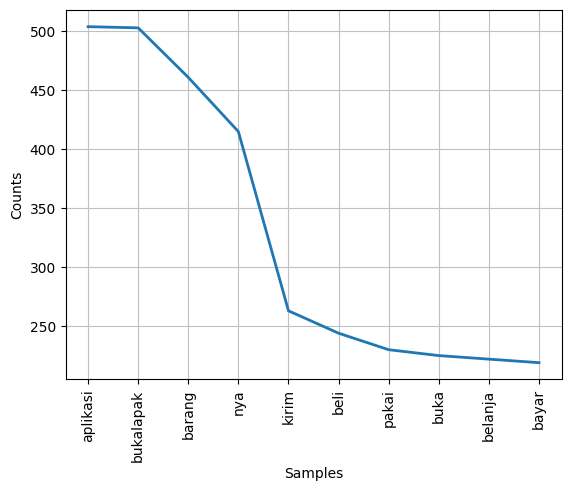

In [66]:
import matplotlib.pyplot as plt

# plotting
fqdist.plot(10,cumulative=False)
plt.show()

In [67]:
label = []
for index, row in name_dataframe.iterrows():
    if row["Rating"] == 5 or row["Rating"] == 4:
        label.append(1)
    else:
        label.append(0)

name_dataframe["label"] = label

name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_siap,label
0,Niko Alberto,1,2023-07-12 03:55:00,kekurangan nya bukalapak itu ongkir nya mahal ...,"[kekurangan, nya, bukalapak, itu, ongkir, nya,...","[kekurangan, bukalapak, itu, ongkir, mahal, pe...","[kekurangan, nya, bukalapak, itu, ongkir, nya,...","[kekurangan, nya, bukalapak, ongkir, nya, maha...","[kurang, nya, bukalapak, ongkir, nya, mahal, k...",kurang nya bukalapak ongkir nya mahal kirim ny...,0
1,Bella Ariesta,1,2023-07-09 12:47:34,saya beli token listrik di bukalapak melalu vi...,"[saya, beli, token, listrik, di, bukalapak, me...","[saya, beli, token, listrik, di, bukalapak, me...","[saya, beli, token, listrik, di, bukalapak, me...","[beli, token, listrik, bukalapak, melalu, virt...","[beli, token, listrik, bukalapak, lalu, virtua...",beli token listrik bukalapak lalu virtual acco...,0
2,Adhitia Okvianto,5,2023-07-02 22:51:36,sangat membantu dalam berbelanja mudah digunak...,"[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[membantu, berbelanja, mudah, ribet, kurangnya...","[bantu, belanja, mudah, ribet, kurang, dipromo...",bantu belanja mudah ribet kurang dipromo ongki...,1
3,Huda Pria Kusuma,1,2023-07-01 19:51:04,saya mengunakan smartphone untuk membuka aplik...,"[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[mengunakan, smartphone, membuka, aplikasi, la...","[mengunakan, smartphone, buka, aplikasi, lamal...",mengunakan smartphone buka aplikasi lamalama k...,0
4,Teddy Kusumawirawan,1,2023-07-13 11:56:59,gak jelas mau transfer retur ke rekening kode ...,"[gak, jelas, mau, transfer, retur, ke, rekenin...","[gak, jelas, mau, transfer, retur, ke, rekenin...","[enggak, jelas, mau, transfer, retur, ke, reke...","[transfer, retur, rekening, kode, otp, dikirim...","[transfer, retur, rekening, kode, otp, kirim, ...",transfer retur rekening kode otp kirim email c...,0
...,...,...,...,...,...,...,...,...,...,...,...
1295,OM_BREW CHANNEL,1,2023-03-27 04:49:40,semakin kesini aplikasi semakin berat dan load...,"[semakin, kesini, aplikasi, semakin, berat, da...","[semakin, kesini, aplikasi, semakin, berat, da...","[semakin, kesini, aplikasi, semakin, berat, da...","[kesini, aplikasi, berat, loading, voucer, ndk...","[kesini, aplikasi, berat, loading, voucer, ndk...",kesini aplikasi berat loading voucer ndk minim...,0
1296,Rifki DF,5,2023-04-20 04:15:32,untuk kinerjanya udah pas mantap maju terus ...,"[untuk, kinerjanya, udah, pas, mantap, maju, t...","[untuk, kinerjanya, udah, pas, mantap, maju, t...","[untuk, kinerjanya, sudah, saat, mantap, maju,...","[kinerjanya, mantap, maju, bukalapak, pelayana...","[kerja, mantap, maju, bukalapak, layan, jual, ...",kerja mantap maju bukalapak layan jual beli,1
1297,Arka na,1,2021-05-24 15:58:25,yang paling menyebalkan adalah terlalu besar m...,"[yang, paling, menyebalkan, adalah, terlalu, b...","[yang, paling, menyebalkan, adalah, terlalu, b...","[yang, paling, menyebalkan, adalah, terlalu, b...","[menyebalkan, memakan, kuota, aplikasi, jaring...","[sebal, makan, kuota, aplikasi, jaring, kuat, ...",sebal makan kuota aplikasi jaring kuat gampang...,0
1298,Aditia Arga Pratama,3,2023-05-17 10:59:59,pilihan untuk pengambilan emas untuk keping ...,"[pilihan, untuk, pengambilan, emas, untuk, kep...","[pilihan, untuk, pengambilan, emas, untuk, kep...","[pilihan, untuk, pengambilan, emas, untuk, kep...","[pilihan, pengambilan, emas, keping, gram, mun...","[pilih, ambil, emas, keping, gram, muncul, pil...",pilih ambil emas keping gram muncul pilih kuri...,0


# **Subjekvity dan Polarity**

In [68]:
#create a user define function to find out polarity & subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#creating another user define function to label the sentiment

def getSentiment(value):
    if value < 0:
        return 'Negative'
    elif value > 0:
        return 'Positive'
    else:
        return 'Neutral'


In [69]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_siap,label
0,Niko Alberto,1,2023-07-12 03:55:00,kekurangan nya bukalapak itu ongkir nya mahal ...,"[kekurangan, nya, bukalapak, itu, ongkir, nya,...","[kekurangan, bukalapak, itu, ongkir, mahal, pe...","[kekurangan, nya, bukalapak, itu, ongkir, nya,...","[kekurangan, nya, bukalapak, ongkir, nya, maha...","[kurang, nya, bukalapak, ongkir, nya, mahal, k...",kurang nya bukalapak ongkir nya mahal kirim ny...,0
1,Bella Ariesta,1,2023-07-09 12:47:34,saya beli token listrik di bukalapak melalu vi...,"[saya, beli, token, listrik, di, bukalapak, me...","[saya, beli, token, listrik, di, bukalapak, me...","[saya, beli, token, listrik, di, bukalapak, me...","[beli, token, listrik, bukalapak, melalu, virt...","[beli, token, listrik, bukalapak, lalu, virtua...",beli token listrik bukalapak lalu virtual acco...,0
2,Adhitia Okvianto,5,2023-07-02 22:51:36,sangat membantu dalam berbelanja mudah digunak...,"[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[membantu, berbelanja, mudah, ribet, kurangnya...","[bantu, belanja, mudah, ribet, kurang, dipromo...",bantu belanja mudah ribet kurang dipromo ongki...,1
3,Huda Pria Kusuma,1,2023-07-01 19:51:04,saya mengunakan smartphone untuk membuka aplik...,"[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[mengunakan, smartphone, membuka, aplikasi, la...","[mengunakan, smartphone, buka, aplikasi, lamal...",mengunakan smartphone buka aplikasi lamalama k...,0
4,Teddy Kusumawirawan,1,2023-07-13 11:56:59,gak jelas mau transfer retur ke rekening kode ...,"[gak, jelas, mau, transfer, retur, ke, rekenin...","[gak, jelas, mau, transfer, retur, ke, rekenin...","[enggak, jelas, mau, transfer, retur, ke, reke...","[transfer, retur, rekening, kode, otp, dikirim...","[transfer, retur, rekening, kode, otp, kirim, ...",transfer retur rekening kode otp kirim email c...,0


In [70]:
from textblob import TextBlob


In [71]:
def run_vader(name_dataframe):
    # Generate VADER sentiment analyzer object
    sid = SentimentIntensityAnalyzer()

In [72]:
name_dataframe['Polarity']=name_dataframe['Ulasan_siap'].apply(getPolarity)
name_dataframe['Subjectivity']=name_dataframe['Ulasan_siap'].apply(getSubjectivity)
name_dataframe['Sentiment']=name_dataframe['Polarity'].apply(getSentiment)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_siap,label,Polarity,Subjectivity,Sentiment
0,Niko Alberto,1,2023-07-12 03:55:00,kekurangan nya bukalapak itu ongkir nya mahal ...,"[kekurangan, nya, bukalapak, itu, ongkir, nya,...","[kekurangan, bukalapak, itu, ongkir, mahal, pe...","[kekurangan, nya, bukalapak, itu, ongkir, nya,...","[kekurangan, nya, bukalapak, ongkir, nya, maha...","[kurang, nya, bukalapak, ongkir, nya, mahal, k...",kurang nya bukalapak ongkir nya mahal kirim ny...,0,0.000000,0.000000,Neutral
1,Bella Ariesta,1,2023-07-09 12:47:34,saya beli token listrik di bukalapak melalu vi...,"[saya, beli, token, listrik, di, bukalapak, me...","[saya, beli, token, listrik, di, bukalapak, me...","[saya, beli, token, listrik, di, bukalapak, me...","[beli, token, listrik, bukalapak, melalu, virt...","[beli, token, listrik, bukalapak, lalu, virtua...",beli token listrik bukalapak lalu virtual acco...,0,0.151515,0.416667,Positive
2,Adhitia Okvianto,5,2023-07-02 22:51:36,sangat membantu dalam berbelanja mudah digunak...,"[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[membantu, berbelanja, mudah, ribet, kurangnya...","[bantu, belanja, mudah, ribet, kurang, dipromo...",bantu belanja mudah ribet kurang dipromo ongki...,1,0.000000,0.000000,Neutral
3,Huda Pria Kusuma,1,2023-07-01 19:51:04,saya mengunakan smartphone untuk membuka aplik...,"[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[mengunakan, smartphone, membuka, aplikasi, la...","[mengunakan, smartphone, buka, aplikasi, lamal...",mengunakan smartphone buka aplikasi lamalama k...,0,0.000000,0.000000,Neutral
4,Teddy Kusumawirawan,1,2023-07-13 11:56:59,gak jelas mau transfer retur ke rekening kode ...,"[gak, jelas, mau, transfer, retur, ke, rekenin...","[gak, jelas, mau, transfer, retur, ke, rekenin...","[enggak, jelas, mau, transfer, retur, ke, reke...","[transfer, retur, rekening, kode, otp, dikirim...","[transfer, retur, rekening, kode, otp, kirim, ...",transfer retur rekening kode otp kirim email c...,0,0.000000,0.000000,Neutral


In [73]:
name_dataframe['month'] = name_dataframe['Date'].dt.month

In [74]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,ulasan_ears,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_siap,label,Polarity,Subjectivity,Sentiment,month
0,Niko Alberto,1,2023-07-12 03:55:00,kekurangan nya bukalapak itu ongkir nya mahal ...,"[kekurangan, nya, bukalapak, itu, ongkir, nya,...","[kekurangan, bukalapak, itu, ongkir, mahal, pe...","[kekurangan, nya, bukalapak, itu, ongkir, nya,...","[kekurangan, nya, bukalapak, ongkir, nya, maha...","[kurang, nya, bukalapak, ongkir, nya, mahal, k...",kurang nya bukalapak ongkir nya mahal kirim ny...,0,0.000000,0.000000,Neutral,7
1,Bella Ariesta,1,2023-07-09 12:47:34,saya beli token listrik di bukalapak melalu vi...,"[saya, beli, token, listrik, di, bukalapak, me...","[saya, beli, token, listrik, di, bukalapak, me...","[saya, beli, token, listrik, di, bukalapak, me...","[beli, token, listrik, bukalapak, melalu, virt...","[beli, token, listrik, bukalapak, lalu, virtua...",beli token listrik bukalapak lalu virtual acco...,0,0.151515,0.416667,Positive,7
2,Adhitia Okvianto,5,2023-07-02 22:51:36,sangat membantu dalam berbelanja mudah digunak...,"[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[sangat, membantu, dalam, berbelanja, mudah, d...","[membantu, berbelanja, mudah, ribet, kurangnya...","[bantu, belanja, mudah, ribet, kurang, dipromo...",bantu belanja mudah ribet kurang dipromo ongki...,1,0.000000,0.000000,Neutral,7
3,Huda Pria Kusuma,1,2023-07-01 19:51:04,saya mengunakan smartphone untuk membuka aplik...,"[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[saya, mengunakan, smartphone, untuk, membuka,...","[mengunakan, smartphone, membuka, aplikasi, la...","[mengunakan, smartphone, buka, aplikasi, lamal...",mengunakan smartphone buka aplikasi lamalama k...,0,0.000000,0.000000,Neutral,7
4,Teddy Kusumawirawan,1,2023-07-13 11:56:59,gak jelas mau transfer retur ke rekening kode ...,"[gak, jelas, mau, transfer, retur, ke, rekenin...","[gak, jelas, mau, transfer, retur, ke, rekenin...","[enggak, jelas, mau, transfer, retur, ke, reke...","[transfer, retur, rekening, kode, otp, dikirim...","[transfer, retur, rekening, kode, otp, kirim, ...",transfer retur rekening kode otp kirim email c...,0,0.000000,0.000000,Neutral,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,OM_BREW CHANNEL,1,2023-03-27 04:49:40,semakin kesini aplikasi semakin berat dan load...,"[semakin, kesini, aplikasi, semakin, berat, da...","[semakin, kesini, aplikasi, semakin, berat, da...","[semakin, kesini, aplikasi, semakin, berat, da...","[kesini, aplikasi, berat, loading, voucer, ndk...","[kesini, aplikasi, berat, loading, voucer, ndk...",kesini aplikasi berat loading voucer ndk minim...,0,0.000000,0.000000,Neutral,3
1296,Rifki DF,5,2023-04-20 04:15:32,untuk kinerjanya udah pas mantap maju terus ...,"[untuk, kinerjanya, udah, pas, mantap, maju, t...","[untuk, kinerjanya, udah, pas, mantap, maju, t...","[untuk, kinerjanya, sudah, saat, mantap, maju,...","[kinerjanya, mantap, maju, bukalapak, pelayana...","[kerja, mantap, maju, bukalapak, layan, jual, ...",kerja mantap maju bukalapak layan jual beli,1,0.000000,0.000000,Neutral,4
1297,Arka na,1,2021-05-24 15:58:25,yang paling menyebalkan adalah terlalu besar m...,"[yang, paling, menyebalkan, adalah, terlalu, b...","[yang, paling, menyebalkan, adalah, terlalu, b...","[yang, paling, menyebalkan, adalah, terlalu, b...","[menyebalkan, memakan, kuota, aplikasi, jaring...","[sebal, makan, kuota, aplikasi, jaring, kuat, ...",sebal makan kuota aplikasi jaring kuat gampang...,0,0.000000,0.000000,Neutral,5
1298,Aditia Arga Pratama,3,2023-05-17 10:59:59,pilihan untuk pengambilan emas untuk keping ...,"[pilihan, untuk, pengambilan, emas, untuk, kep...","[pilihan, untuk, pengambilan, emas, untuk, kep...","[pilihan, untuk, pengambilan, emas, untuk, kep...","[pilihan, pengambilan, emas, keping, gram, mun...","[pilih, ambil, emas, keping, gram

In [75]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# **Visualisasi Bobot Nilai**

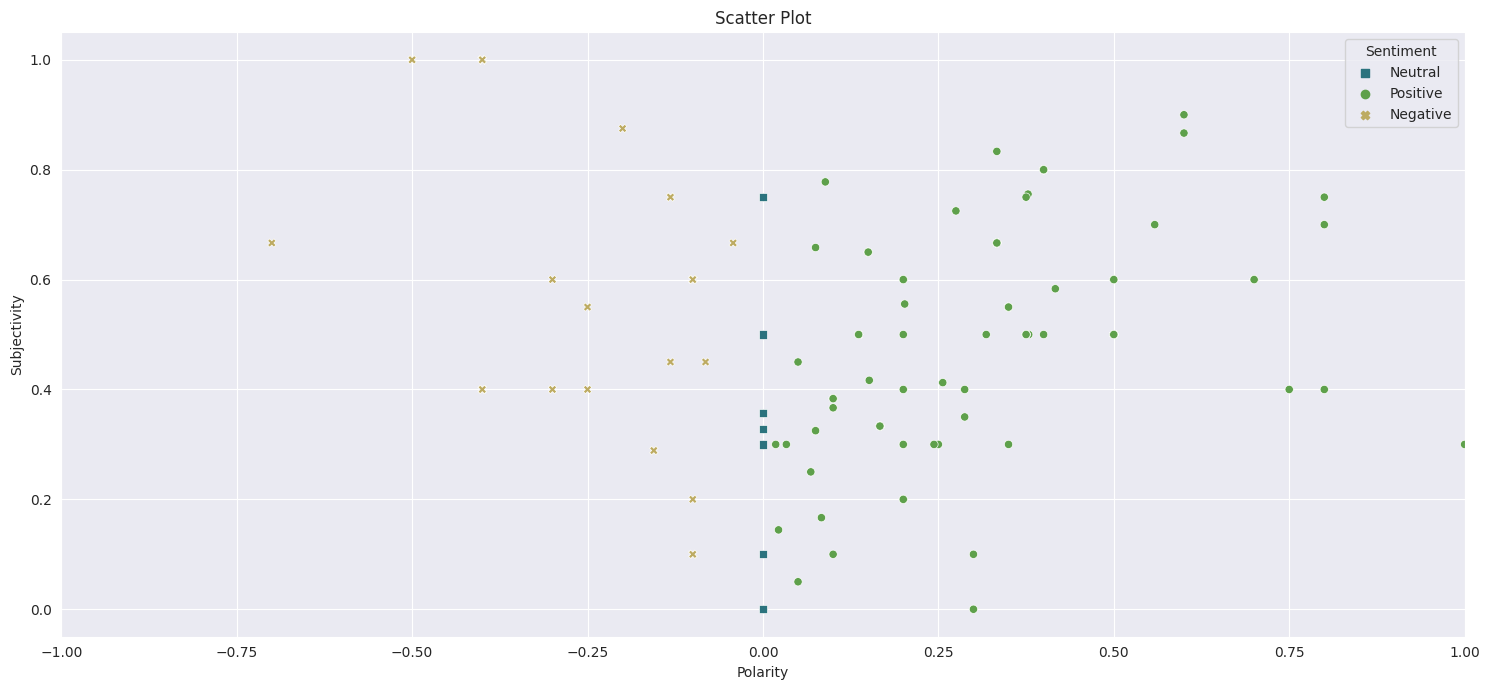

In [76]:
# Create scatter plot
sns.set_style('darkgrid')
plt.figure(figsize = (15,7))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=name_dataframe, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

# **Visualiasi Polarity dan subjecvity perbulan**

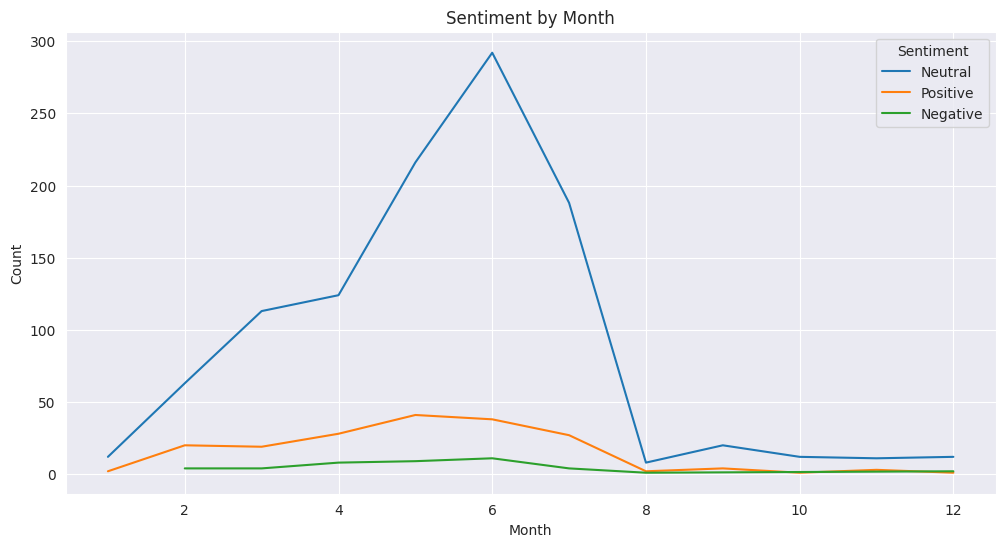

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by month and sentiment
sentiment_df = name_dataframe.groupby(['month', 'Sentiment']).size().reset_index(name='Count')


# Plot the sentiment counts by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Count', hue='Sentiment', data=sentiment_df)
plt.title('Sentiment by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

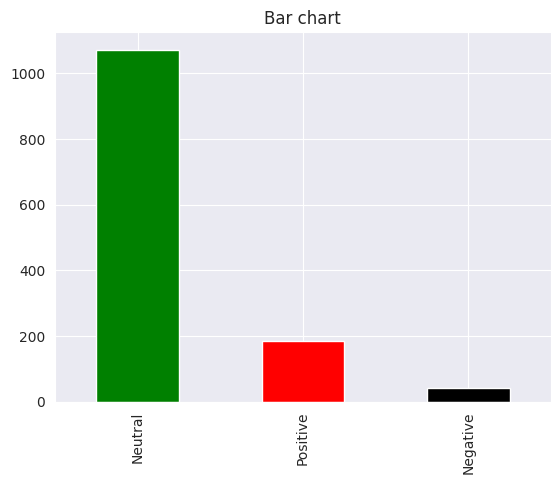

In [78]:
sentimen_data=pd.value_counts(name_dataframe["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red", "black"])
plt.title('Bar chart')
plt.show()

In [79]:
name_dataframe["Sentiment"].value_counts()

Neutral     1071
Positive     186
Negative      43
Name: Sentiment, dtype: int64

In [80]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [81]:
Ulasan = name_dataframe['Ulasan_siap']

In [82]:
Ulasan.isnull().sum()

0

# **Proses (TF-IDF)**

In [83]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

3751


In [84]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata

{'kurang': 1759,
 'nya': 2306,
 'bukalapak': 575,
 'ongkir': 2371,
 'mahal': 1965,
 'kirim': 1659,
 'lambat': 1822,
 'chat': 707,
 'lapak': 1837,
 'update': 3614,
 'resi': 2831,
 'tau': 3328,
 'lalai': 1808,
 'coba': 729,
 'banding': 257,
 'aplikasi': 169,
 'transfer': 3523,
 'proses': 2717,
 'duluan': 1003,
 'sistem': 3160,
 'rubah': 2888,
 'saing': 2908,
 'kompetitor': 1701,
 'beli': 359,
 'token': 3478,
 'listrik': 1912,
 'lalu': 1809,
 'virtual': 3657,
 'account': 9,
 'saldo': 2916,
 'potong': 2673,
 'bayar': 317,
 'verifikasi': 3648,
 'komplen': 1711,
 'live': 1914,
 'cs': 768,
 'banget': 262,
 'bantu': 275,
 'sulit': 3249,
 'main': 1969,
 'kah': 1514,
 'ambil': 119,
 'hak': 1251,
 'milik': 2130,
 'orang': 2398,
 'download': 987,
 'pikir': 2625,
 'deh': 840,
 'belanja': 347,
 'mudah': 2174,
 'ribet': 2855,
 'dipromo': 929,
 'jarang': 1436,
 'berat': 389,
 'terimakasih': 3386,
 'mengunakan': 2102,
 'smartphone': 3182,
 'buka': 560,
 'lamalama': 1813,
 'kepala': 1616,
 'pusing': 273

In [85]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 169)	2
  (0, 257)	1
  (0, 575)	2
  (0, 707)	1
  (0, 729)	1
  (0, 1003)	1
  (0, 1659)	2
  (0, 1701)	1
  (0, 1759)	1
  (0, 1808)	1
  (0, 1822)	1
  (0, 1837)	2
  (0, 1965)	1
  (0, 2306)	6
  (0, 2371)	1
  (0, 2717)	1
  (0, 2831)	1
  (0, 2888)	1
  (0, 2908)	1
  (0, 3160)	1
  (0, 3328)	1
  (0, 3523)	1
  (0, 3614)	1
  (1, 9)	1
  (1, 119)	1
  :	:
  (1297, 1756)	2
  (1297, 1822)	1
  (1297, 1974)	1
  (1297, 2306)	2
  (1297, 2317)	1
  (1297, 2478)	1
  (1297, 2985)	1
  (1297, 3494)	1
  (1298, 119)	1
  (1298, 1039)	2
  (1298, 1212)	1
  (1298, 1621)	1
  (1298, 1761)	1
  (1298, 2187)	1
  (1298, 2626)	2
  (1298, 2916)	1
  (1298, 3102)	1
  (1299, 156)	1
  (1299, 169)	1
  (1299, 575)	1
  (1299, 668)	1
  (1299, 942)	1
  (1299, 1623)	1
  (1299, 2642)	1
  (1299, 3246)	1


In [86]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

beli token listrik bukalapak lalu virtual account saldo potong bayar verifikasi komplen live chat cs nya banget bantu sulit main kah ambil hak milik orang download aplikasi bukalapak pikir deh


In [87]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 9)	1
  (0, 119)	1
  (0, 169)	1
  (0, 262)	1
  (0, 275)	1
  (0, 317)	1
  (0, 359)	1
  (0, 575)	2
  (0, 707)	1
  (0, 768)	1
  (0, 840)	1
  (0, 987)	1
  (0, 1251)	1
  (0, 1514)	1
  (0, 1711)	1
  (0, 1809)	1
  (0, 1912)	1
  (0, 1914)	1
  (0, 1969)	1
  (0, 2130)	1
  (0, 2306)	1
  (0, 2398)	1
  (0, 2625)	1
  (0, 2673)	1
  (0, 2916)	1
  (0, 3249)	1
  (0, 3478)	1
  (0, 3648)	1
  (0, 3657)	1


In [88]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[7.4777413  6.56145057 7.4777413  ... 6.78459412 7.4777413  7.4777413 ]
  (0, 3657)	0.2506763451815661
  (0, 3648)	0.17858196331301193
  (0, 3478)	0.20392272729896213
  (0, 3249)	0.17028914203916595
  (0, 2916)	0.15837778556896923
  (0, 2673)	0.1712325087253587
  (0, 2625)	0.22822030266165905
  (0, 2398)	0.17421098339091254
  (0, 2306)	0.09634824468554189
  (0, 2130)	0.2172295789230251
  (0, 1969)	0.21134034320644088
  (0, 1914)	0.1482495004765743
  (0, 1912)	0.21134034320644088
  (0, 1809)	0.2856826916405987
  (0, 1711)	0.18918871990379782
  (0, 1514)	0.24371085774176093
  (0, 1251)	0.23782162202517668
  (0, 987)	0.1996734175740557
  (0, 840)	0.15448923782249152
  (0, 768)	0.14334477379740151
  (0, 707)	0.1308866397693944
  (0, 575)	0.16710243520596924
  (0, 359)	0.10974488344759037
  (0, 317)	0.11732658440169434
  (0, 275)	0.1215074396921812
  (0, 262)	0.12958037886480434
  (0, 169)	0.08542484150992775
  (0, 119)	0.1996734175740557
  (0, 9)	0.2506763451815661


In [89]:
data_label = name_dataframe[["Nama pengguna", "Ulasan_siap", "Sentiment"]]

In [90]:
data_label["Ulasan_siap"] = data_label["Ulasan_siap"].fillna("tidak ada komentar")

<ipython-input-90-63aa05b24bd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label["Ulasan_siap"] = data_label["Ulasan_siap"].fillna("tidak ada komentar")


In [91]:
data_label.to_excel("data_label.xlsx")

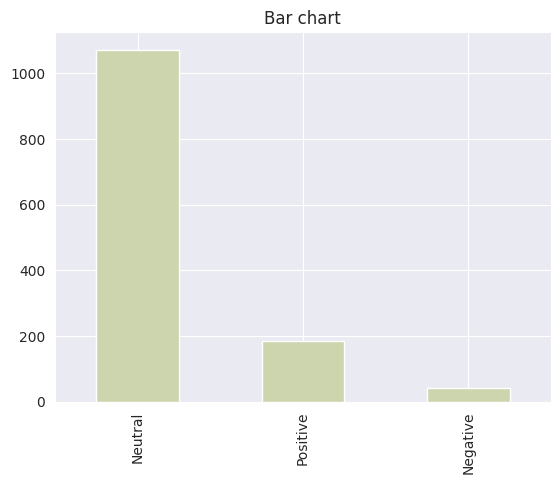

In [92]:
sentimen_data=pd.value_counts(data_label["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["#ccd5ae"])
plt.title('Bar chart')
plt.show()

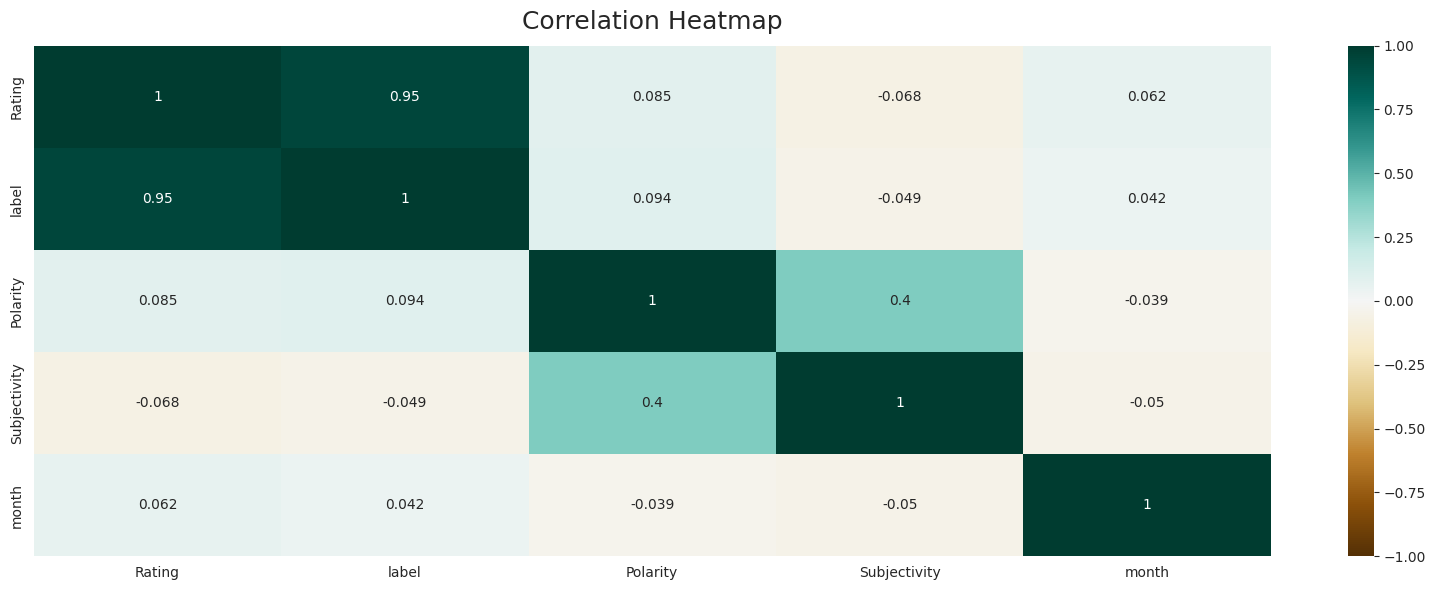

In [93]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(name_dataframe.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()

In [94]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'ulasan_ears', 'Ulasan_normalized', 'Ulasan_stop_removed',
       'Ulasan_Stemmed', 'Ulasan_siap', 'label', 'Polarity', 'Subjectivity',
       'Sentiment', 'month'],
      dtype='object')

In [95]:
train_s3 = data_label[data_label["Sentiment"] == 'Neutral']

# **Proses visualiasi kata terbanyak dari Neutral**

In [96]:
train_s3["Ulasan_siap"] = train_s3["Ulasan_siap"].fillna("tidak ada komentar")

<ipython-input-96-4fc6d4cc0ecf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s3["Ulasan_siap"] = train_s3["Ulasan_siap"].fillna("tidak ada komentar")


Neutral words


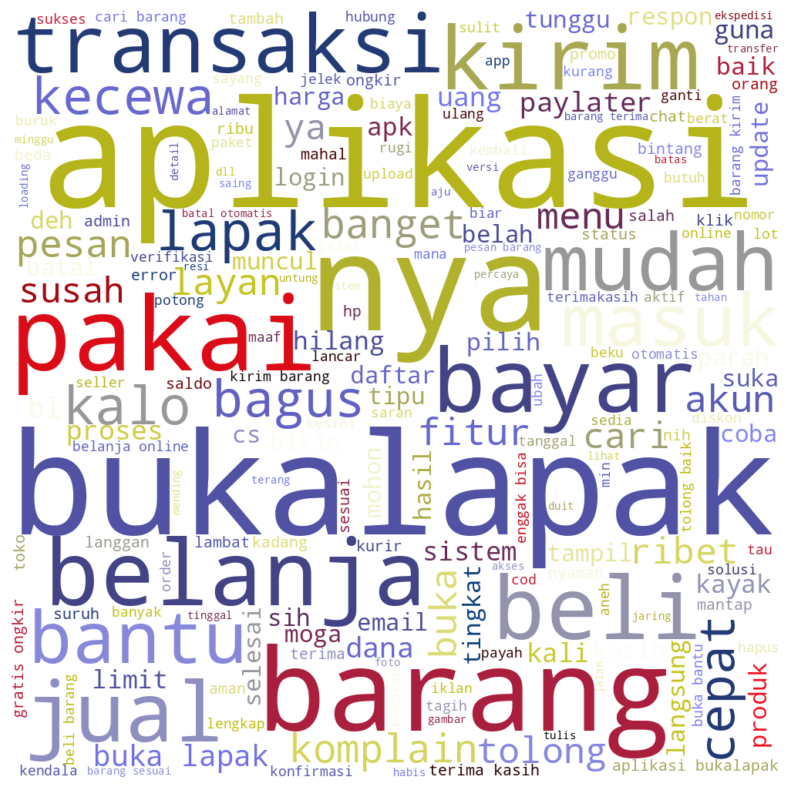

In [97]:
all_text_s0 = ' '.join(word for word in train_s3["Ulasan_siap"])
wordcloud = WordCloud(colormap='gist_stern', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
print("Neutral words")
plt.show()

In [98]:
from wordcloud import WordCloud

In [99]:
train_s0 = data_label[data_label["Sentiment"] == 'Negative']

In [100]:
train_s0["Ulasan_siap"] = train_s0["Ulasan_siap"].fillna("tidak ada komentar")

<ipython-input-100-dc46e426e77c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan_siap"] = train_s0["Ulasan_siap"].fillna("tidak ada komentar")


In [101]:
train_s0

,Nama pengguna,Ulasan_siap,Sentiment
6,Popi Anggraini,transfer baca virtual account verifikasi saldo...,Negative
12,Dadang Setiaji,saldo dana sambung tibatiba potong voucher gam...,Negative
18,Adityo Nur,beku alas kalo bekuin akun baik kasih alas jal...,Negative
74,agus jatnika,kasih bintang segitu blapak buka detail pesan ...,Negative
149,hidayat mudaris,tolong rumit verifikasi akun saldo bukalapak p...,Negative
217,Afifur Rohman,aplikasi bagus minus ongkir mahal voucher paka...,Negative
261,Ilham Padka Wijaya,bukalapak marketplace nya sellerseller tipu ka...,Negative
312,imam maliki,hati hubung akun aplkasi iniakun kena hack tra...,Negative
313,Infinik smart6 Infinik smart6,bintang deh gagal pinjem alas pinjam tunai akt...,Negative
343,Farhan Fiddin,beli emas buka emas tarik alas konekai masalah...,Negative


# **Proses visualiasi kata terbanyak dari Negatif**

Negatif words


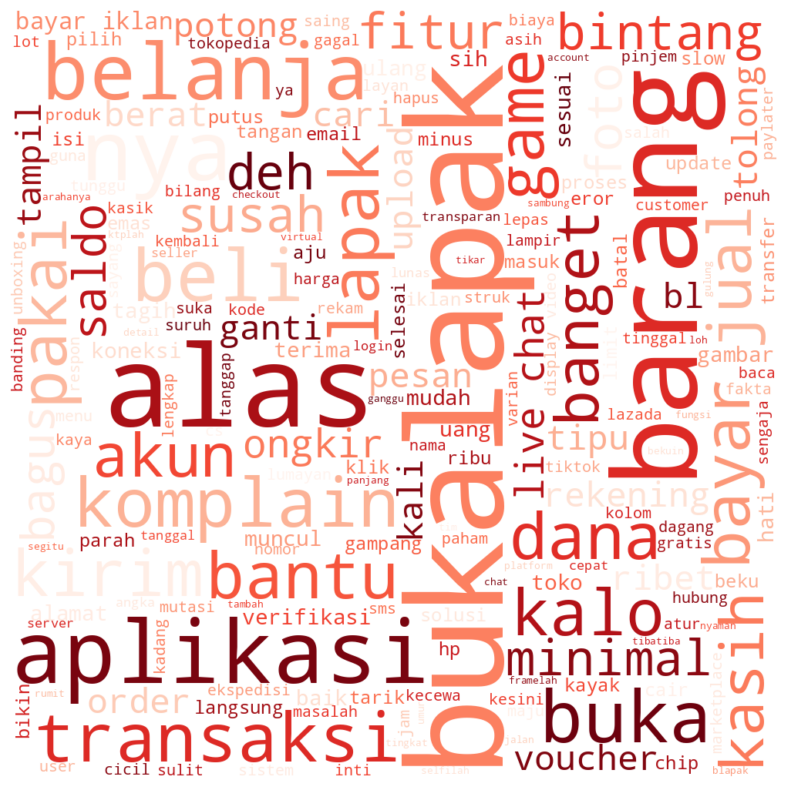

In [102]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan_siap"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
print("Negatif words")
plt.show()

# **Proses visualiasi kata terbanyak dari Positif**

In [103]:
train_s1 = data_label[data_label["Sentiment"] == 'Positive']

In [104]:
train_s1["Ulasan_siap"] = train_s1["Ulasan_siap"].fillna("tidak ada komentar")

<ipython-input-104-d1952b0b5859>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan_siap"] = train_s1["Ulasan_siap"].fillna("tidak ada komentar")


In [105]:
train_s1

,Nama pengguna,Ulasan_siap,Sentiment
1,Bella Ariesta,beli token listrik bukalapak lalu virtual acco...,Positive
14,Getrudis Ladjar,tanggal sd tanggal bayar transaksi bukalapak m...,Positive
15,Sakir Aral,kasih limit paylater pakai belanja fitur bantu...,Positive
19,Deni A#061,ayo ramai un install bukalapak mending pindah ...,Positive
23,Winny,paylater nya parah ya suka gagal gilir tagih a...,Positive
...,...,...,...
1278,Mentoring Online,saran informasi akun home tampil informasi aku...,Positive
1280,Maulana Malik Ibrahim,tolong baik sistemnyadari segi ambil presentas...,Positive
1283,Liana Apriani,muas belanja ya fitur ganggu klik tambah keran...,Positive
1287,Pengguna Google,aplikasi user friendly mudah proses bayar pili...,Positive


Positif words


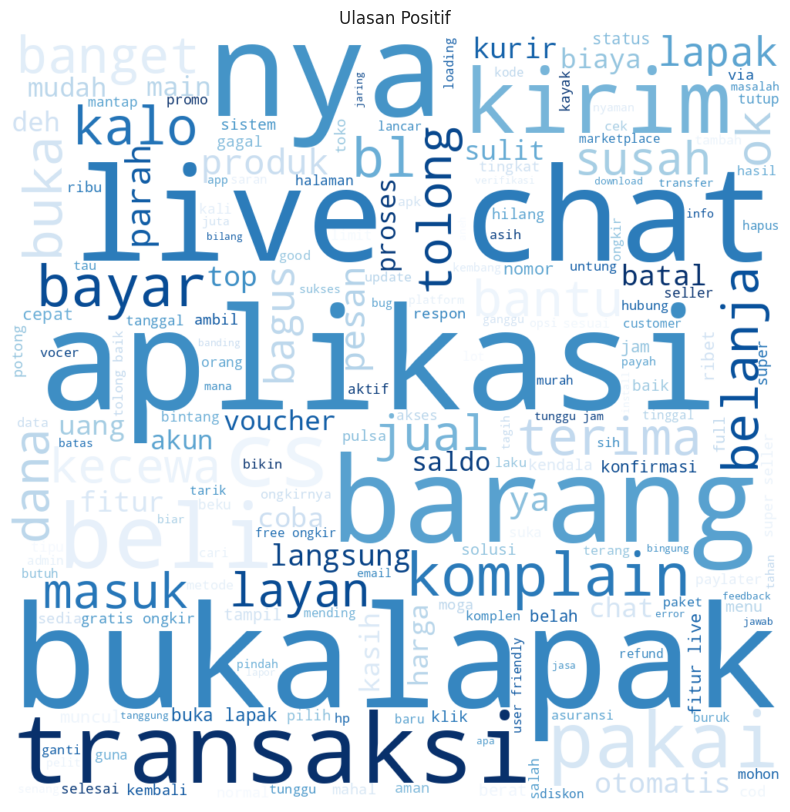

In [106]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan_siap"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
print("Positif words")
plt.show()

In [107]:
data_label['Ulasan_clean'] = data_label['Ulasan_siap'].fillna("tidak ada komentar")

<ipython-input-107-2ed151e306fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['Ulasan_clean'] = data_label['Ulasan_siap'].fillna("tidak ada komentar")


In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# **Mensplit Data Ulasan Siap Dan Data Sentiment**

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_siap'], data_label['Sentiment'],
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

# **Melakukan Pembelajaran Melihat Akurasi Dan Mendapatkan Kolom Baru Prediksi**

In [110]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [134]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_label['Ulasan_siap'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data_label['Sentiment'], test_size=0.2, random_state=42)

# Train the Gaussian Naive Bayes classifier on the training set
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)

# Evaluate the classifier on the testing set
accuracy = gnb.score(X_test.toarray(), y_test)
print('Accuracy:', accuracy)

# Evaluate the classifier on the testing set
y_pred = gnb.predict(X_test.toarray())
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Use the classifier to predict the sentiment class for all reviews in the dataset
data_label['predicted_sentiment_class'] = gnb.predict(X.toarray())

# Save the resulting dataframe to a new CSV file
data_label.to_csv('predicted_sentiment1.csv', index=False)

Accuracy: 0.6038461538461538
              precision    recall  f1-score   support

    Negative       0.09      0.20      0.13        10
     Neutral       0.83      0.66      0.73       212
    Positive       0.23      0.42      0.29        38

    accuracy                           0.60       260
   macro avg       0.38      0.43      0.38       260
weighted avg       0.72      0.60      0.65       260



<ipython-input-134-100d2ce1e090>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['predicted_sentiment_class'] = gnb.predict(X.toarray())


In [112]:
import numpy as np

X_train = X_train.toarray()
X_test = X_test.toarray()


# **Melihat Akurasi Terbaik**



In [113]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Gaussian Naive Bayes with original data
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_gnb = gnb.predict(X_test)
print('Original Results:')
print(classification_report(y_test, y_gnb))
print(confusion_matrix(y_test, y_gnb))
print('Accuracy with original test data:', accuracy_score(y_test, y_gnb))

# Gaussian Naive Bayes with undersampling
rus = RandomUnderSampler(random_state=1)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
gnb = GaussianNB()
gnb.fit(X_rus, y_rus)
y_gnb = gnb.predict(X_test)
print('Undersampling Results:')
print(classification_report(y_test, y_gnb))
print('Accuracy with undersampling test data:', accuracy_score(y_test, y_gnb))

# Gaussian Naive Bayes with oversampling
smote = SMOTE(random_state=1)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
gnb = GaussianNB()
gnb.fit(X_smote, y_smote)
y_gnb = gnb.predict(X_test)
print('Oversampling Results:')
print(classification_report(y_test, y_gnb))
print('Accuracy with oversampling test data:', accuracy_score(y_test, y_gnb))

# Gaussian Naive Bayes with combined oversampling and undersampling
rus = RandomUnderSampler(random_state=1)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

smote = SMOTE(random_state=1)
X_smt, y_smt = smote.fit_resample(X_rus, y_rus)

gnb = GaussianNB()
gnb.fit(X_smt, y_smt)
y_gnb = gnb.predict(X_test)
print('Combined Oversampling and Undersampling Results:')
print(classification_report(y_test, y_gnb))
print('Accuracy with combined oversampling and undersampling test data:', accuracy_score(y_test, y_gnb))


Original Results:
              precision    recall  f1-score   support

    Negative       0.09      0.20      0.13        10
     Neutral       0.83      0.66      0.73       212
    Positive       0.23      0.42      0.29        38

    accuracy                           0.60       260
   macro avg       0.38      0.43      0.38       260
weighted avg       0.72      0.60      0.65       260

[[  2   6   2]
 [ 20 139  53]
 [  0  22  16]]
Accuracy with original test data: 0.6038461538461538
Undersampling Results:
              precision    recall  f1-score   support

    Negative       0.10      0.70      0.17        10
     Neutral       0.92      0.41      0.57       212
    Positive       0.20      0.47      0.28        38

    accuracy                           0.43       260
   macro avg       0.40      0.53      0.34       260
weighted avg       0.78      0.43      0.51       260

Accuracy with undersampling test data: 0.4307692307692308
Oversampling Results:
              prec

In [114]:
import numpy as np

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer             #menghitung n menjumlah kan dan menjumlah kan tf and n berdasarkan seluruh dokumen
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [116]:
data_label['predicted_sentiment_class'].value_counts()

Neutral     922
Positive    292
Negative     86
Name: predicted_sentiment_class, dtype: int64

# **VISUALISASI Hasil Prediksi**

<Axes: >

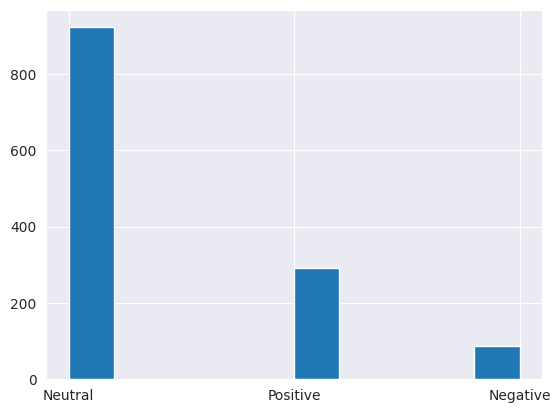

In [117]:
data_label['predicted_sentiment_class'].hist()

In [118]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# **CrossValidation gaussion naive bayes**

**sample random**

mengambil secara acak dari daftar sample atau sampling frame yang tersedia setiap individu memiliki peluang yang sama untuk terpilih
peluang tersebut ada melakukan peluang sama ketika mempunyai data besar akan memliki peluang lebih besar untuk terpilih tetapi sebaliknya ketika mempunyai data dikit dapat peluang lebih sedikit

In [119]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_siap'], data_label['Sentiment'],
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create the Naive Bayes Classifier object
gnb = GaussianNB()

# Perform cross-validation
scores = cross_val_score(gnb, X_train.toarray(), y_train, cv=5)

# Print the cross-validation scores
print('Cross-validation scores:', scores)

# Fit the classifier to the training data
gnb.fit(X_train.toarray(), y_train)

# Predict the sentiment of the test data
y_pred = gnb.predict(X_test.toarray())

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Cross-validation scores: [0.57264957 0.64957265 0.6025641  0.58547009 0.62393162]
Confusion Matrix:
 [[ 0  4  0]
 [10 66 31]
 [ 0 15  4]]


In [120]:
# Convert sparse matrix to dense numpy array
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Print the scores on the training and test sets
print('Training set score: {:.4f}'.format(gnb.score(X_train_dense, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test_dense, y_test)))

#ternyata permasalahannya bukan traning tapi test set score nya 0.50%

Training set score: 0.8966
Test set score: 0.5385


In [121]:
accuracy = gnb.score(X_test.toarray(), y_test)
print('Accuracy:', accuracy)

Accuracy: 0.5384615384615384


In [122]:
vectorizer

TfidfVectorizer()

In [123]:
nb = GaussianNB(var_smoothing=1.0) # untuk tidak overviting

# **Data Prediksi**

In [137]:
data_label.tail(100)

,Nama pengguna,Ulasan_siap,Sentiment,Ulasan_clean,predicted_sentiment_class
1200,Tri Handoko Semarang,barang sesuai pesan kecewa pokok,Neutral,barang sesuai pesan kecewa pokok,Negative
1201,Azzura Channel Indonesia,terimakasihbiar setia bukalapak,Neutral,terimakasihbiar setia bukalapak,Neutral
1202,Rudu Sudiro utomo,payah bos saldo dompet pakai belanja susah kla...,Neutral,payah bos saldo dompet pakai belanja susah kla...,Neutral
1203,Zubaidi Mamla,nomor hp komplin dibukalapak susah ya komplin ...,Neutral,nomor hp komplin dibukalapak susah ya komplin ...,Positive
1204,Aga Wicaksono,mantap paylaternya bantu,Neutral,mantap paylaternya bantu,Positive
...,...,...,...,...,...
1295,OM_BREW CHANNEL,kesini aplikasi berat loading voucer ndk minim...,Neutral,kesini aplikasi berat loading voucer ndk minim...,Neutral
1296,Rifki DF,kerja mantap maju bukalapak layan jual beli,Neutral,kerja mantap maju bukalapak layan jual beli,Neutral
1297,Arka na,sebal makan kuota aplikasi jaring kuat gampang...,Neutral,sebal makan kuota aplikasi jaring kuat gampang...,Neutral
1298,Aditia Arga Pratama,pilih ambil emas keping gram muncul pilih kuri...,Neutral,pilih ambil emas keping gram muncul pilih kuri...,Neutral


# **CONFIUSIN MATRIK**
melihat seberapa baik distribusi dari setiap kelas

In [125]:
cm = confusion_matrix(y_test,y_pred)

In [126]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred))

--------------------- confusion matrix  ----------------------------
[[ 0  4  0]
 [10 66 31]
 [ 0 15  4]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.78      0.62      0.69       107
    Positive       0.11      0.21      0.15        19

    accuracy                           0.54       130
   macro avg       0.30      0.28      0.28       130
weighted avg       0.66      0.54      0.59       130



# **Melihat Kesalahan Classifikasi**

<Axes: >

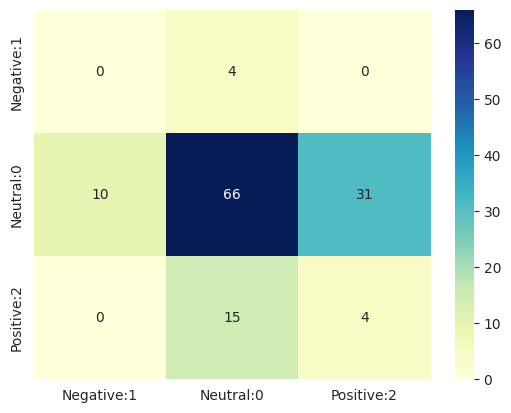

In [127]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Negative:1', 'Neutral:0', 'Positive:2'],
                                 index=['Negative:1', 'Neutral:0', 'Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [128]:
X_test

<130x3515 sparse matrix of type '<class 'numpy.float64'>'
	with 1576 stored elements in Compressed Sparse Row format>

In [129]:
X_train

<1170x3515 sparse matrix of type '<class 'numpy.float64'>'
	with 16702 stored elements in Compressed Sparse Row format>

In [130]:
y_test

712      Neutral
92       Neutral
1160     Neutral
400      Neutral
216      Neutral
          ...   
184     Positive
855      Neutral
1204     Neutral
153      Neutral
946      Neutral
Name: Sentiment, Length: 130, dtype: object

In [131]:
y_train

277      Neutral
90       Neutral
474      Neutral
1231     Neutral
122      Neutral
          ...   
231      Neutral
597     Positive
48       Neutral
362     Negative
1070     Neutral
Name: Sentiment, Length: 1170, dtype: object

In [132]:
print(y_train)

277      Neutral
90       Neutral
474      Neutral
1231     Neutral
122      Neutral
          ...   
231      Neutral
597     Positive
48       Neutral
362     Negative
1070     Neutral
Name: Sentiment, Length: 1170, dtype: object
